# Lecture 11 
## CNN MNIST <hr/>

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

mnist = input_data.read_data_sets('MNIST_data/', one_hot = True)

C:\Users\che99\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


### Conv layer 1

In [3]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, 784])
X_img = tf.reshape(X, [-1, 28, 28, 1]) # -1  because None
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01)) # 32 of 3x3 filters 
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding='SAME') # Conv > (?, 28, 28, 32)
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME') # Conv > (?, 14, 14, 32)


### Conv layer 1

In [4]:
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding = 'SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# Fully - connected layer
L2 = tf.reshape(L2, [-1, 7 * 7 * 64])

### Fully Connected (FC, Dense) layer

In [18]:
# Final FC 7 x 7 x 64 > 10 outputs
W3 = tf.get_variable('W3', shape=[7 * 7 * 64, 10],
                    initializer = tf.contrib.layers.xavier_initializer())
b = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L2, W3) + b

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=hypothesis, labels=Y))
optimizer = tf.train.AdadeltaOptimizer(learning_rate=0.2).minimize(cost)

ValueError: Variable W3 already exists, disallowed. Did you mean to set reuse=True or reuse=tf.AUTO_REUSE in VarScope? Originally defined at:

  File "C:\Users\che99\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access
  File "C:\Users\che99\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3392, in create_op
    op_def=op_def)
  File "C:\Users\che99\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)


### Training and Evaluation

In [19]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [23]:
training_epochs = 10
batch_size = 100
print('Leaning started, It takes sometime.')
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _, = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
    print('Epoch:' '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
    
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print('Test\n', 'Accuracy:', sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))

Leaning started, It takes sometime.
Epoch:0001 cost = 0.086887280
Epoch:0002 cost = 0.082624685
Epoch:0003 cost = 0.078094468
Epoch:0004 cost = 0.074352480
Epoch:0005 cost = 0.071488444
Epoch:0006 cost = 0.070193513
Epoch:0007 cost = 0.065168707
Epoch:0008 cost = 0.065588071
Epoch:0009 cost = 0.061854201
Epoch:0010 cost = 0.060618526
Test
 Accuracy: 0.9805


----- TEST -----
Accuracy: 98.05% 



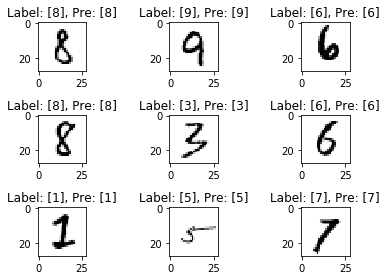

In [24]:
print('----- TEST -----')
print('Accuracy: {:.2f}% \n' 
      .format(accuracy.eval(session=sess, feed_dict={X:mnist.test.images, Y:mnist.test.labels}) * 100 ,'%'))

for i in range(9):
    
    r = random.randint(0, len(mnist.test.images))
    plt.subplot(3,3,i+1)

    plt.title('Label: {}, Pre: {}'.format(sess.run(tf.argmax(mnist.test.labels[r:r+1], 1)),
                                                  sess.run(tf.argmax(hypothesis, 1), 
                                                           feed_dict={X: mnist.test.images[r:r+1]})))
    plt.imshow(mnist.test.images[r:r+1].reshape(28, 28),
          cmap = 'Greys', interpolation='nearest')
    plt.tight_layout()